In [2]:
import sys
import spacy
import nltk
import pandas as pd
from itertools import combinations
from textblob import TextBlob
from sklearn.metrics.pairwise import cosine_similarity
from emot.emo_unicode import UNICODE_EMO, EMOTICONS
import string
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stop_words = stopwords.words()
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.lancaster import LancasterStemmer
from nltk.corpus import wordnet
from nltk.corpus import words
import re
import itertools
from gensim.parsing.preprocessing import remove_stopwords
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import TruncatedSVD
from nltk import pos_tag
from wordcloud import WordCloud
#nltk.download('wordnet')
#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('words')
#nltk.download('averaged_perceptron_tagger')

In [15]:
#pip install wordcloud

In [16]:
netflix_df=pd.read_csv('netflix_titles.csv')

In [17]:
netflix_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [18]:
stop_words = stopwords.words("english")
#stemmer = SnowballStemmer("english")
other_sw = ['oh','yeah','got','hey']
alphabets = list(string.ascii_lowercase)
stop_words = stop_words + alphabets
word_list = words.words() 

In [19]:
def clean_text(txt):
    if type(txt)!=str:
        txt=str(txt)
    txt=re.sub(r'[0-9]+','', txt)
    txt=txt.lower() 

    tokens=word_tokenize(txt)
    lemma=WordNetLemmatizer()
    #l=[lemma.lemmatize(w) for w in tokens]
    l=[w for w in tokens if w not in stop_words]
    l=[w for w in l if w not in other_sw]
    l=[w for w in l if w in word_list]

    clean=[c for c in l if c not in string.punctuation]
    clean=' '.join(lemma.lemmatize(w) for w in clean)

    return "".join(clean) 

In [20]:
netflix_df['clean_description'] = netflix_df['description'].apply(clean_text)

In [21]:
netflix_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,clean_description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,future elite inhabit island paradise far crowd...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,devastating earthquake city trapped life wait ...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",army recruit found dead fellow forced confront...
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",world hide fear dangerous exterminate brave ne...
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,brilliant group become intent swindling millio...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,civil war family left grief little search
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,scrappy poor boy way tycoon family facing fear...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",documentary south rapper nasty stage street ci...
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,dessert wizard next willy tense competition sk...


In [22]:
netflix_df.to_csv('netflix-clean.csv')

In [23]:
cv_tfidf=TfidfVectorizer()

In [24]:
corpus=netflix_df['clean_description'].tolist()

In [25]:
cv_tfidf=TfidfVectorizer(stop_words="english")
X_tfidf=cv_tfidf.fit_transform(corpus).toarray()
dt_tfidf=pd.DataFrame(X_tfidf,columns=cv_tfidf.get_feature_names())
dt_tfidf

,abandon,abandoned,abandonment,abbey,abduct,abduction,abiding,abigail,ability,able,...,zimbabwe,zip,zipper,zippy,zodiac,zombie,zone,zoo,zoologist,zorro
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7783,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7784,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7785,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
dt_tfidf[dt_tfidf.abandoned!=0]

,abandon,abandoned,abandonment,abbey,abduct,abduction,abiding,abigail,ability,able,...,zimbabwe,zip,zipper,zippy,zodiac,zombie,zone,zoo,zoologist,zorro
76,0.0,0.283933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
446,0.0,0.287852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
782,0.0,0.392219,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1312,0.0,0.327199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1700,0.0,0.315960,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1854,0.0,0.357195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2402,0.0,0.312607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2811,0.0,0.354847,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2826,0.0,0.338912,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3577,0.0,0.332429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
netflix_df.iloc[76]['description']

'Student filmmakers uncover occult rituals tied to an abandoned warehouse, then gradually realize the horror is closer than they think.'

In [51]:
lsa = TruncatedSVD(10)
X_topic = lsa.fit_transform(X_tfidf)  #fit onto vectorized X data
lsa.explained_variance_ratio_

array([0.00199352, 0.00343262, 0.00318407, 0.00302144, 0.00291454,
       0.00282248, 0.00255862, 0.00253683, 0.00239098, 0.00228991])

In [52]:
topic_word = pd.DataFrame(lsa.components_.round(3),
             index = ["component_1","component_2","component_3","component_4","component_5",
                     "component_6","component_7","component_8","component_9","component_10"],
             columns = cv_tfidf.get_feature_names())   #use name of vectorizer 'cv'
topic_word

,abandon,abandoned,abandonment,abbey,abduct,abduction,abiding,abigail,ability,able,...,zimbabwe,zip,zipper,zippy,zodiac,zombie,zone,zoo,zoologist,zorro
component_1,0.0,0.008,0.001,0.001,0.002,0.002,0.0,0.001,0.008,0.001,...,0.001,0.001,0.000,0.001,0.001,0.005,0.004,0.001,0.000,0.000
component_2,0.0,0.002,0.003,-0.002,-0.001,0.001,-0.0,0.000,-0.003,-0.000,...,-0.001,0.002,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.001,0.001
component_3,0.0,0.005,-0.000,0.001,0.006,-0.000,-0.0,0.001,0.001,-0.000,...,0.000,0.000,-0.000,0.000,-0.001,0.001,0.004,-0.001,-0.001,-0.000
component_4,-0.0,-0.008,-0.001,-0.001,-0.001,0.001,-0.0,-0.000,-0.002,0.001,...,-0.001,-0.001,-0.000,-0.000,-0.001,-0.007,0.000,-0.000,-0.000,-0.000
component_5,-0.0,0.004,0.000,-0.001,-0.001,-0.000,-0.0,-0.000,0.002,0.001,...,0.002,0.001,0.000,0.001,-0.001,0.002,-0.004,-0.001,-0.000,-0.000
component_6,-0.0,0.001,0.004,0.001,0.000,0.000,-0.0,-0.000,-0.002,0.000,...,-0.001,0.000,0.000,-0.001,0.001,-0.005,-0.002,0.000,-0.000,-0.001
component_7,0.0,-0.003,0.002,-0.001,-0.001,-0.000,-0.0,-0.001,0.008,0.001,...,-0.001,-0.000,-0.001,-0.000,-0.003,0.001,0.003,-0.001,-0.001,-0.000
component_8,-0.0,-0.003,0.000,0.001,-0.000,-0.001,0.0,0.001,-0.002,-0.001,...,0.000,-0.001,0.001,-0.000,0.001,0.002,-0.004,0.001,0.000,-0.001
component_9,-0.0,-0.004,0.002,0.001,-0.002,-0.003,0.0,-0.001,-0.002,-0.002,...,-0.000,0.001,0.000,-0.001,-0.003,-0.001,-0.002,-0.002,0.001,0.001
component_10,0.0,0.000,0.001,0.002,-0.001,-0.001,-0.0,0.000,0.000,-0.000,...,-0.000,0.001,0.002,0.000,-0.003,-0.001,0.002,-0.002,-0.000,0.000


In [53]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [54]:
display_topics(lsa,cv_tfidf.get_feature_names(),5)


Topic  0
life, young, new, family, love

Topic  1
young, woman, love, father, family

Topic  2
school, high, new, student, teen

Topic  3
life, love, school, high, romance

Topic  4
new, york, life, city, home

Topic  5
family, father, home, series, brother

Topic  6
world, life, family, father, way

Topic  7
love, world, family, true, special

Topic  8
documentary, woman, young, new, family

Topic  9
series, special, comedy, comedian, world


In [55]:
cv = CountVectorizer(stop_words = 'english')
X_cv = cv.fit_transform(netflix_df.clean_description)
X_cv

<7787x8653 sparse matrix of type '<class 'numpy.int64'>'
	with 67690 stored elements in Compressed Sparse Row format>

In [56]:
tw = cv.get_feature_names()
cv_df = pd.DataFrame(X_cv.toarray(), columns=tw)
cv_df

,abandon,abandoned,abandonment,abbey,abduct,abduction,abiding,abigail,ability,able,...,zimbabwe,zip,zipper,zippy,zodiac,zombie,zone,zoo,zoologist,zorro
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7783,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7784,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7785,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
nmf = NMF(n_components=10, random_state=42)

# fit the transfomed content with NMF
nmf.fit(X_tfidf)

# display the result
for index,topic in enumerate(nmf.components_):
    print(f"The top 20 words for topic # {index}")
    print([cv_tfidf.get_feature_names()[i] for i in topic.argsort()[-20:]])
    print("\n")

/Users/juju/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


The top 20 words for topic # 0
['inspired', 'sketch', 'history', 'fun', 'people', 'explore', 'diverse', 'popular', 'hit', 'set', 'anthology', 'drama', 'special', 'animated', 'reality', 'true', 'story', 'based', 'comedy', 'series']


The top 20 words for topic # 1
['relationship', 'child', 'search', 'leaf', 'escape', 'seeking', 'wealthy', 'change', 'past', 'mother', 'romance', 'girl', 'marry', 'couple', 'marriage', 'boy', 'husband', 'father', 'woman', 'young']


The top 20 words for topic # 2
['club', 'senior', 'football', 'group', 'party', 'classmate', 'team', 'popular', 'secret', 'girl', 'drama', 'crush', 'romance', 'best', 'teacher', 'college', 'teen', 'student', 'high', 'school']


The top 20 words for topic # 3
['drama', 'better', 'daily', 'teenage', 'book', 'live', 'upside', 'wife', 'come', 'film', 'trying', 'different', 'crime', 'comedian', 'job', 'personal', 'death', 'comic', 'career', 'life']


The top 20 words for topic # 4
['break', 'learn', 'adventure', 'start', 'night', 'ye

In [67]:
nmf.fit(X_cv)

# display the result
for index,topic in enumerate(nmf.components_):
    print(f"The top 20 words for topic # {index}")
    print([cv.get_feature_names()[i] for i in topic.argsort()[-20:]])
    print("\n")

/Users/juju/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


The top 20 words for topic # 0
['better', 'brother', 'turned', 'way', 'trying', 'work', 'different', 'wife', 'upside', 'live', 'film', 'personal', 'job', 'come', 'crime', 'comic', 'turn', 'death', 'career', 'life']


The top 20 words for topic # 1
['powerful', 'wealthy', 'set', 'make', 'seeking', 'prison', 'reality', 'child', 'escape', 'adventure', 'search', 'romance', 'battle', 'marriage', 'soon', 'mother', 'couple', 'girl', 'boy', 'young']


The top 20 words for topic # 2
['leave', 'comedian', 'friend', 'learn', 'live', 'night', 'time', 'struggling', 'year', 'star', 'special', 'past', 'couple', 'soon', 'old', 'town', 'home', 'city', 'york', 'new']


The top 20 words for topic # 3
['future', 'vacation', 'patriarch', 'husband', 'torn', 'work', 'special', 'secret', 'wedding', 'matriarch', 'past', 'social', 'business', 'home', 'father', 'time', 'brother', 'drama', 'wealthy', 'family']


The top 20 words for topic # 4
['learning', 'star', 'survive', 'people', 'travel', 'big', 'secret', 'd

In [58]:
topic_words = pd.DataFrame(nmf.components_.round(5),
             index = ["component_1","component_2",
                     "component_3","component_4",
                     "component_5"],
             columns = cv_tfidf.get_feature_names())
topic_words

,abandon,abandoned,abandonment,abbey,abduct,abduction,abiding,abigail,ability,able,...,zimbabwe,zip,zipper,zippy,zodiac,zombie,zone,zoo,zoologist,zorro
component_1,0.000000,0.007790,0.000000,0.001648,0.000000,0.000000,0.000770,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.001827,0.000000,0.006230,0.000000,0.000000,0.004604,0.001559,0.000000
component_2,0.000039,0.007346,0.003523,0.000000,0.000000,0.001589,0.000000,0.000000,0.002771,0.000000,...,0.000000,0.004448,0.000000,0.000000,0.000000,0.005313,0.006098,0.000000,0.000000,0.002685
component_3,0.000003,0.002120,0.000000,0.004085,0.008432,0.000000,0.000000,0.000348,0.004936,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010525,0.000000,0.000000,0.000000
component_4,0.000000,0.000000,0.000000,0.000000,0.000000,0.004567,0.000000,0.000000,0.012099,0.003883,...,0.000000,0.000000,0.000020,0.000000,0.000000,0.000000,0.005000,0.000000,0.000000,0.000000
component_5,0.000000,0.009393,0.000000,0.000000,0.002529,0.000000,0.000195,0.000000,0.008323,0.000000,...,0.004779,0.000000,0.000389,0.001382,0.000000,0.007738,0.000000,0.000000,0.000000,0.000000
component_6,0.000000,0.000000,0.008866,0.000112,0.000000,0.000000,0.000000,0.000000,0.003349,0.000000,...,0.000000,0.000000,0.000261,0.000000,0.000000,0.000000,0.000000,0.000078,0.000013,0.000000
component_7,0.000045,0.000000,0.000000,0.000000,0.000000,0.000000,0.000259,0.000272,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000765,0.000000,0.000000,0.001588,0.000000,0.000000
component_8,0.000000,0.000000,0.000000,0.000059,0.000000,0.000000,0.000574,0.000000,0.014602,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.009484,0.001520,0.000155,0.000329,0.000000
component_9,0.000891,0.023301,0.000068,0.002117,0.008246,0.005246,0.000000,0.002826,0.008033,0.003802,...,0.000674,0.001451,0.000000,0.002300,0.002739,0.011962,0.004641,0.000430,0.000220,0.000000
component_10,0.000071,0.000000,0.000000,0.002466,0.000000,0.000000,0.001175,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000047,0.000000,0.000121,0.000000,0.000000,0.000000,0.001842,0.000000


In [62]:
corpus

['future elite inhabit island paradise far crowded get chance join saved squalor',
 'devastating earthquake city trapped life wait trying desperately stay alive',
 'army recruit found dead fellow forced confront terrifying secret jungle island training camp',
 'world hide fear dangerous exterminate brave newcomer group',
 'brilliant group become intent swindling million blackjack',
 'genetics professor treatment comatose sister medical shamanic shocking side effect',
 'awful accident couple admitted grisly hospital must find escape death',
 'high school teacher weary gang warfare new york city school system teach thinking must le hostile environment',
 'doctor go missing psychiatrist wife bizarre medical condition psychic patient much leading',
 'architect wife move castle become luxury something inside determined stop renovation',
 'farmer confession wife murder death beginning macabre based king novella',
 'dark thriller law student detective uncover conspiracy',
 'archival video new

In [63]:
netflix_df['description2']=netflix_df['description'].str.lower()
netflix_df['description2']=netflix_df['description2'].apply(word_tokenize)
netflix_df['description2']=netflix_df['description2'].apply(lambda x: [word for word in x if word not in stop_words])
netflix_df['description2']=netflix_df['description2'].apply(lambda x: list(set(x)))

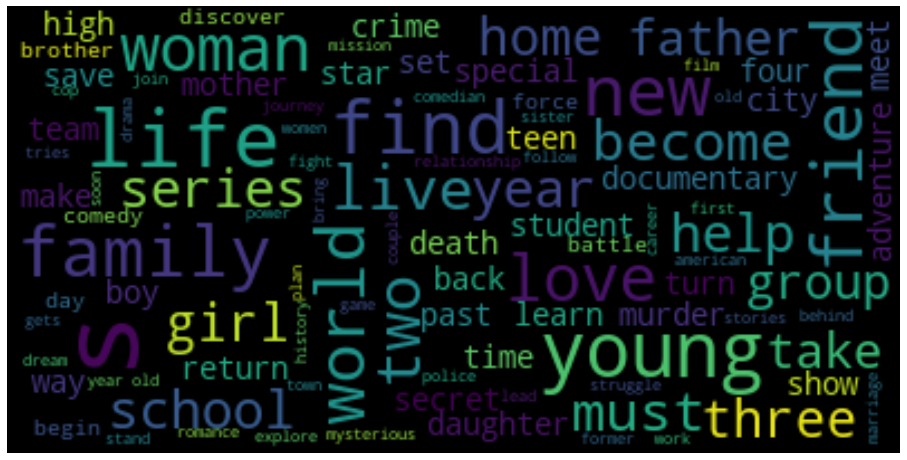

In [66]:
lst = netflix_df['description2'].tolist()
lst = list(itertools.chain(*lst))
description = ' '.join(lst)

plt.figure(figsize=(16,12))
wordcloud = WordCloud(max_font_size=50, max_words=100).generate(description)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()